In [1]:
# import packages needed
from IPython.display import HTML
import matplotlib.image as mpimg
import numpy as np
import cv2
import imutils

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [9]:
def drawWindow(img,x="0",y="0",s=10,hsvRange=False):
    try:
        """
        input is original image, top left position of window relative to the original image (x,y), and size one side of the square window. Output is window respective to inputted terms
        """
        _x, _y = int(x), int(y)
        _image = mpimg.imread(img)
        _window = _image[_y:+_y+s,_x:_x+s]
        _hsvImage = np.array([])
        res = _window
        
        #Outlining
        _imgCopy = _image.copy()
        _outlineColor = (0,255,0)
        _outlineSize = 7
        _imgOutline = cv2.rectangle(_imgCopy,(_x,_y),(_x+s,_y+s),_outlineColor,_outlineSize)
        
        if hsvRange:
            hH, sH, vH = 0, 0, 0
            hL, sL, vL = 255, 255, 255
            _hsvImage = cv2.cvtColor(_window, cv2.COLOR_BGR2HSV)
            for i in _hsvImage:
                for j in i:
                    hH = j[0] if hH < j[0] else hH
                    hL = j[0] if hL > j[0] else hL
                    sH = j[1] if sH < j[1] else sH
                    sL = j[1] if sL > j[1] else sL
                    vH = j[2] if vH < j[2] else vH
                    vL = j[2] if vL > j[2] else vL
            res = [_window, [(hL, hH), (sL, sH), (vL, vH)]]
            print("H: %s to %s, S: %s to %s, V: %s to %s" % (hL, hH, sL, sH, vL, vH))
        
        plt.figure(figsize=(14,10))
        plt.subplot(1, 2, 1)
        plt.title(img)
        plt.imshow(_window)
        
        plt.subplot(1, 2, 2)
        plt.title("Outline")
        plt.imshow(_imgOutline)
        plt.show()
        del _image, _window, _hsvImage
        return res
    except AttributeError:
        return "Please input a valid image"
    except OSError:
        return "Please input a valid image"
    except ValueError:
        return "Input out of image range"

In [10]:
interact(drawWindow, img="",x="0",y="0",s=widgets.IntSlider(min=1, max=100, step=2, value=0), FindHSVRange=False)

interactive(children=(Text(value='', description='img'), Text(value='0', description='x'), Text(value='0', des…

<function __main__.drawWindow(img, x='0', y='0', s=10, hsvRange=False)>

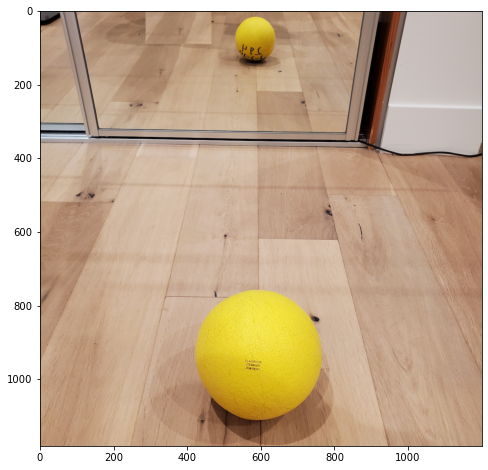

In [64]:
# balls_img2 = mpimg.imread('powercell_mirror_balls2.jpg')

# plt.figure(figsize=(8,8))
# plt.imshow(balls_img2)
# plt.show()